# Stationarity (ADF) Testing 

firstly dekhe ne `statsmodels` install ache kina na thakle `pip install statsmodels` lekh anaconda prompt e

##### - The Augmented Dickey Fuller Test (ADF) holo unit root test for stationarity. 
##### - eta check kore tomar time series is stationary kina.

##### - `stationary time` series holo emon time series jar statistical properties jemon 
#####  mean, variance, autocorrelation gulo somoy er sathe constant. 
##### - eigulo ekmatro series ta stationary future behavior er descriptors hobe .

In [4]:
import numpy as np
import pandas as pd

#faltu ka warnings jate na dey
from warnings import filterwarnings 
filterwarnings('ignore')

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df=pd.read_csv('Portfolio_1.csv')

df.sample(10)

,Date,BINDALAGRO_Close,DATAMATICS_Close,GICHSGFIN_Close,JTEKTINDIA_Close,OLECTRA_Close,SUNFLAG_Close,SUVEN_Close,VENKEYS_Close,Average_Close
474,20141203,32.549999,75.699997,187.250000,59.450001,13.200000,28.600000,220.100006,291.433319,113.535415
789,20160311,31.750000,50.200001,216.699997,42.900002,17.450001,21.400000,201.350006,302.750000,110.562501
133,20130711,17.299999,24.000000,114.849998,10.800000,11.250000,18.450001,25.549999,308.533325,66.341665
2266,20220307,21.799999,247.100006,129.550003,72.000000,583.400024,66.349998,72.650002,1957.250000,393.762504
269,20140129,24.000000,51.200001,101.099998,17.549999,9.400000,16.100000,73.699997,310.566681,75.452085
1912,20201001,12.300000,76.849998,94.900002,75.900002,63.349998,42.450001,50.650002,1456.400024,234.100003
1345,20180612,24.500000,109.000000,388.350006,103.199997,176.550003,75.050003,230.899994,2482.600098,448.768763
1723,20191231,9.300000,72.849998,156.399994,89.400002,175.000000,37.900002,307.100006,1760.250000,326.025000
1556,20190424,14.000000,100.500000,254.600006,105.949997,219.649994,47.200001,266.750000,2077.449951,385.762494
1875,20200811,10.450000,66.650002,100.099998,65.900002,62.400002,46.599998,50.700001,1108.449951,188.906244


In [6]:
import matplotlib.pyplot as plt

amader main column `Average_Close` tai ota niyei kaaj korte hobe 

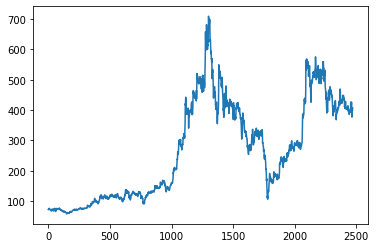

In [7]:
# plot kore dekhi 

plt.plot(df['Average_Close'])

so eta ki stationary ?
ans = MS Dhoni , I mean Definitely Not

dekhe to bojha jacche but proof kivabe korbo ?

tar jonno ache

## ADF testing
#### ADF testing korte amader 2 to jinis lage
##### 1) `NULL Hypothesis` 2) `Alternet Hypothesis`

### 1) `NULL HYPOTHESIS`:-
 Null Hypothesis kaj kore jokhon series `non stationary` hoy lage
### 2) `ALTERNET HYPOTHESIS`:-
 jokhon data `stationary` hoy tokhon eta kaje lage

##### jodi `ADF Statistic < Critical value` hoy tahole Null Hypothesis gelo 

##### jodi `ADF Statistic > Critical value` hoy tahole Null Hypothesis k reject korbona 

1) ADF Statistic = jeta bar korbo  2) Critical values = otao function call korle berobe

### <u>Eta korte gele amader kache `adfuller()` bole ekta function ache jetay :- 

1) result[0] = ADF Statistics

2) result[1]= p value

3) result[4] = ekta array jate critical values thake  

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [9]:
# ebar kore dekhi

x=df['Average_Close'].values
result=adfuller(x)
print('ADF Statistics = %f' %result[0])
print('p value = %f' %result[1])
print('Critical Values : ')
for x,y in result[4].items():
    print('\t %s : %f' %(x,y))


ADF Statistics = -1.538429
p value = 0.514423
Critical Values : 
	 1% : -3.433012
	 5% : -2.862716
	 10% : -2.567396


##### ebar ADF Testing 2 vabe Koew
1. p value jeta ache ota jodi `p-value > 0.05` hoy tahole **non stationary** ar `p-value <= 0.05` hole **stationary**

2. ADF Statistics ta `critical value r cheye boro hole` **stationary** na hole **non stationary** 

### Ami 2 toi AND diye dekhbo

EKta function banai j sob kaaj korbe

In [17]:
def test(index):
    x=df[index].values
    result=adfuller(x)
    if(result[1] >0.05 and result[0]>result[4]['1%'] and result[0]>result[4]['5%'] and result[0]>result[4]['10%']):
        print('Data is NON STATIONARY')
    else:
        print('Data is STATIONARY')

In [18]:
test('Average_Close')

Data is NON STATIONARY


#### Ekhon amader 1st Order Difference niye dekhte hobe

In [21]:
# 1st oorder diff mane df['Average_Close'][i+1]-df['Average_Close'][i]

df['dif_1']=df['Average_Close'].diff()

In [23]:
# null kota ache dekhe ni

df['dif_1'].isna().sum()

1

In [26]:
# interpolation kore soralam

df['dif_1']=df['dif_1'].interpolate(method='linear',limit_direction='both')

In [27]:
#abar ekbar dekhe ni

df['dif_1'].isna().sum()

0

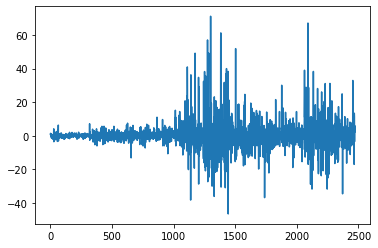

In [28]:
plt.plot(df['dif_1']) #polt

agertar theke close to mean holo mane `stationarity barbe` 

In [29]:
# test function call diye dekhi

test('dif_1')

Data is STATIONARY


In [30]:
# ekbar kore dekhi

x=df['dif_1'].values
result=adfuller(x)
print('ADF Statistics = %f' %result[0])
print('p value = %f' %result[1])
print('Critical Values : ')
for x,y in result[4].items():
    print('\t %s : %f' %(x,y))

ADF Statistics = -19.677129
p value = 0.000000
Critical Values : 
	 1% : -3.433007
	 5% : -2.862714
	 10% : -2.567395


## Tarmane amader 1st order Difference tai `Stationary Data` 

####  2nd order difference ta niye dekhi etao stationary hole 1st order tao thik ache 

In [31]:
df['dif_2']=df['dif_1'].diff()

In [32]:
df['dif_2'].isna().sum()

1

In [33]:
df['dif_2']=df['dif_2'].interpolate(method='linear',limit_direction='both')

In [34]:
df['dif_1'].isna().sum()

0

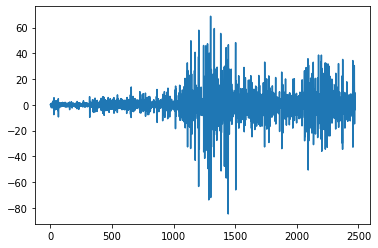

In [35]:
plt.plot(df['dif_2'])

In [36]:
test('dif_2')

Data is STATIONARY


## 2 Toi Dicche mane Amader ta thik ache 

#### tar mane amader 1st order er data tai stationary

Ebar 1st order ta rekhe csv baniye ni

In [37]:
df.head()

,Date,BINDALAGRO_Close,DATAMATICS_Close,GICHSGFIN_Close,JTEKTINDIA_Close,OLECTRA_Close,SUNFLAG_Close,SUVEN_Close,VENKEYS_Close,Average_Close,dif_1,dif_2
0,20121231,32.099998,30.200001,128.250000,12.85,11.80,23.850000,30.900000,309.766663,72.464583,0.856250,0.000000
1,20130101,32.049999,30.400000,132.550003,12.90,11.15,24.000000,31.750000,311.766663,73.320833,0.856250,0.000000
2,20130102,31.700001,30.750000,134.550003,12.95,11.00,24.650000,31.250000,321.433319,74.785415,1.464582,0.608332
3,20130103,31.549999,31.600000,138.250000,13.00,10.85,26.950001,31.299999,321.133331,75.579166,0.793751,-0.670831
4,20130104,31.400000,30.400000,140.750000,12.90,10.85,26.500000,32.500000,318.433319,75.466665,-0.112501,-0.906252


In [38]:
# last e dif_2 ta ache ota lagbena tai ota delete kore di

del df[df.columns[-1]] 

In [39]:
df.head()

,Date,BINDALAGRO_Close,DATAMATICS_Close,GICHSGFIN_Close,JTEKTINDIA_Close,OLECTRA_Close,SUNFLAG_Close,SUVEN_Close,VENKEYS_Close,Average_Close,dif_1
0,20121231,32.099998,30.200001,128.250000,12.85,11.80,23.850000,30.900000,309.766663,72.464583,0.856250
1,20130101,32.049999,30.400000,132.550003,12.90,11.15,24.000000,31.750000,311.766663,73.320833,0.856250
2,20130102,31.700001,30.750000,134.550003,12.95,11.00,24.650000,31.250000,321.433319,74.785415,1.464582
3,20130103,31.549999,31.600000,138.250000,13.00,10.85,26.950001,31.299999,321.133331,75.579166,0.793751
4,20130104,31.400000,30.400000,140.750000,12.90,10.85,26.500000,32.500000,318.433319,75.466665,-0.112501


In [40]:
#csv ta save kori

df.to_csv("Stationary.csv",index=False)